# índice

- [Computador conceitual](#Computador-conceitual)
    - [Caso de teste 1](#Caso-de-teste-1)
    - [Caso de teste 2](#Caso-de-teste-2)

In [3]:
pathFileImages = 'C:/Users/Takeshi/Documents/GitHub/Aula5/Noções Básicas sobre Erros/Figuras Erros/'

from IPython.display import Image
from IPython.display import HTML
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import math
import statistics 

# Computador conceitual

<font size="+2"> Faça um computador conceitual para realizar a operação abaixo para t dígitos (na base 10) igual a 3, e o expoente deve variar de -3 a 3. Fazer as simulações para os casos de teste abaixo para o trucamento e o arrendodamento. Vejam que são erros relativos  </font>

In [4]:
def EA(valor_real, valor_aproximado):
    return abs(valor_real - valor_aproximado)

def ER(valor_real, valor_aproximado):
    return abs((EA(valor_real, valor_aproximado) / valor_aproximado))

def getNumber():
    return abs(np.random.normal())

def computer(value, option=1, decimal_limit = 3, min_exp = -3, max_exp = 3):
    exp = 0
    
    if(value < 0):
        value = abs(value)
        
    while(value < 0.1):
        value *= 10
        exp -= 1
    
    while(value > 1):
        value /= 10
        exp += 1

    if(exp > max_exp):
        #print('Overflow')
        return 999
    elif(exp < min_exp):
        #print('Underflow')
        return 10**-4
    
    #To Round: 0
    #To Truncate: 1
    
    if option == 0:
        if(decimal_limit - exp > decimal_limit):
            value = round(value*10**exp,decimal_limit)
        else:
            value = round(value*10**exp,decimal_limit - exp)
        return value
    else:
        value = float(str(value)[:2+3])
        return round(value*10**exp, decimal_limit)

print(computer(0.1267))
print(computer(5.659))
print(computer(5.659532))
print(computer(54.6545))
print(computer(124.56464))
print(computer(435.5436456))
print(computer(0.00435))

0.126
5.65
5.65
54.6
124.0
435.0
0.004


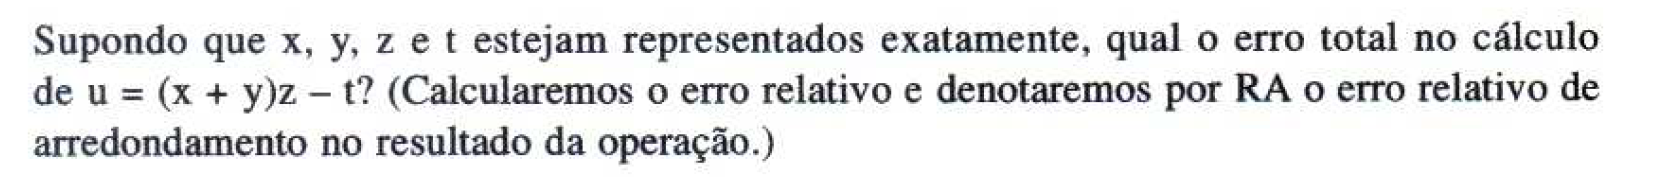

In [5]:
Image(filename = pathFileImages + 'FigErro32.png')

## Caso de teste 1

<font size="+2"> O x, y, z e t, que são números em ponto flutuante, devem ser gerados aleatoriamente e para esse caso de teste devem ser considerados exatos. Ou seja, não é considerado o erro quando é feito o arrendodamento ou o trucamento de cada um deles para 3 casas, e assim não é contabilizado no erro total. 

 </font>

<font size="+2"> 
Considerar o erro de cada suboperação (soma, multiplicação e subtração) da operação acima, conforme é feito no livro. Realizar a operação 100 vezes e calcular a média e o desvio padrão do erro para cada suboperação e do erro total. Comparar com a expressão: </font>

Média: 1813.8387838943188
Desvio Padrão: 5003.846249817946


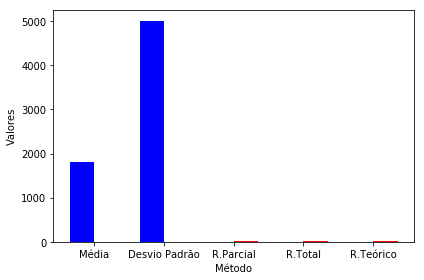

In [209]:
def soma(x, x_, y, y_):
    pre_arredondado = x_ + y_
    pos_arredondado = computer(pre_arredondado)
    EAxy = EA(x, x_) + EA(y, y_)
    ERxy = EAxy / (x_ + y_)
    RA = ER(pre_arredondado, pos_arredondado)
    return pos_arredondado, ERxy + RA

def subtracao(x, x_, y, y_):
    pre_arredondado = x_ - y_
    pos_arredondado = computer(pre_arredondado)
    EAxy = abs(EA(x, x_) - EA(y, y_))
    ERxy = abs(EAxy / (x_ - y_))
    RA = ER(pre_arredondado, pos_arredondado)
    return pos_arredondado, ERxy + RA

def multiplicacao(x, x_, y, y_):
    pre_arredondado = x_ * y_
    pos_arredondado = computer(pre_arredondado)
    EAxy = y_*EA(x, x_) + x_*EA(y, y_)
    ERxy = ER(x, x_) + ER(y, y_)
    RA = ER(pre_arredondado, pos_arredondado)
    return pos_arredondado, ERxy + RA
    
def operacao(x,y,z,t):
    #Representação s = (x+y)
    s, erro_soma = soma(x,x,y,y)
    #Representação m = s x z
    m, erro_multiplicacao = multiplicacao(x+y,s,z,z)
    #Representação u = m - t
    u, erro_subtracao = subtracao(s*z,m,t,t)
    op_exato = (x+y)*z-t
    # u é o op_aproximado
    return ER(op_exato, u)



output = []
for i in range(0,100):
    #Gera números representáveis no computador proposto
    x, y, z, t = np.random.uniform(10**-4, 0.999*10**3, 4)
    operacao(x, y, z, t)
    output.append(operacao(x,y,z,t))

    
#Obter a média dos erros: statistics.mean(lista), retorna a média de uma lista.
print('Média:',statistics.mean(output))
media = statistics.mean(output)
#Obter o desvio padrão dos erros
print('Desvio Padrão:',statistics.pstdev(output))
desvio = statistics.pstdev(output)

n_groups = 5
#bar1 para truncamento
#bar2 para arredondamento
bar1 = (media, desvio, 3, 4, 5)
bar2 = (1, 4, 9, 16, 25)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
rects1 = ax.bar(index, bar1, bar_width, color='b')
rects2 = ax.bar(index + bar_width, bar2, bar_width, color='r')
ax.set_xlabel('Método')
ax.set_ylabel('Valores')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Média', 'Desvio Padrão','R.Parcial', 'R.Total', 'R.Teórico'))
fig.tight_layout()
plt.show()

In [ ]:
Image(filename = pathFileImages + 'FigErro36.png')

<font size="+2"> Comparar graficamente os resultados parciais, total e o teórico. Fazer um gráfico de barra para cada suboperação, o erro total e o teórico. Os gráficos podem ser  semelhantes aos mostrados abaixo. Veja que existirão barras para o caso do arredondamento e para o truncamento  </font>

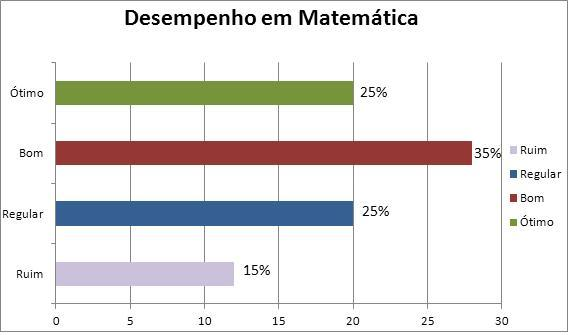

In [11]:
Image(filename = pathFileImages + 'barraI.jpg')

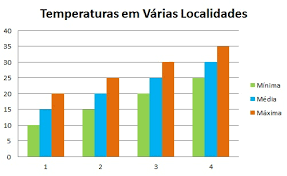

In [10]:
Image(filename = pathFileImages + 'barraII.png')

## Caso de teste 2

<font size="+2"> Igual ao anterior, exceto que o erro de arrendondamento ou truncamento do x, y, z e t são considerados. Ou seja, quando forem arrendondados e truncados, considerar esses erros ao erro total </font>

## Erro teórico

<font size="+2"> Extra: plote a equação final do erro para diferentes valores de t </font>

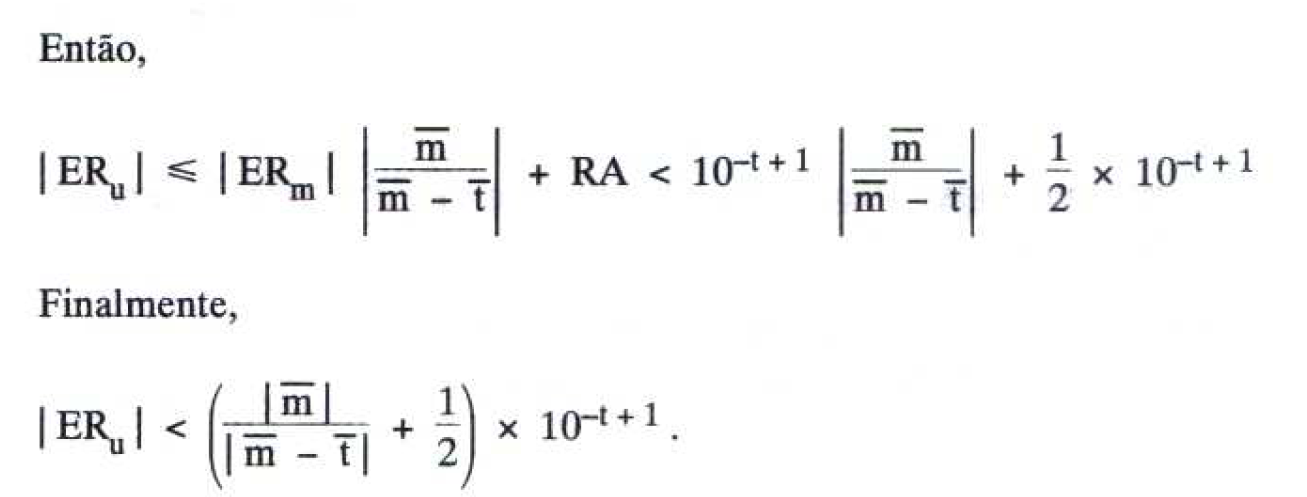

In [9]:
Image(filename = pathFileImages + 'FigErro36.png')